## LAB - 5 End-to-End Classification Pipeline

## NAME: MAHAK KHURDIA -------------------- ID: 202518039

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import warnings
warnings.filterwarnings("ignore")

### Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

In [73]:
df = pd.read_csv('Customer_Churn.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Correcting Datatype

In [76]:
print(df["TotalCharges"].dtype)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df["TotalCharges"].dtype)

object
float64


Converting the Object data type to Numerical to perform meaningful analysis

In [77]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [78]:
missing_counts = df.isna().sum()
missing_per = (missing_counts/len(df))*100
print(missing_per)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


Finding the persentage of null values in the dataset helps us identify the columns that need proper handling of null values
as in this dataset we can observe that there are no null values in most of the columns except the TotalCharges which only has 0.15% of null values
which we can handle in our Preporcessing pipeline

### Data Visualisation

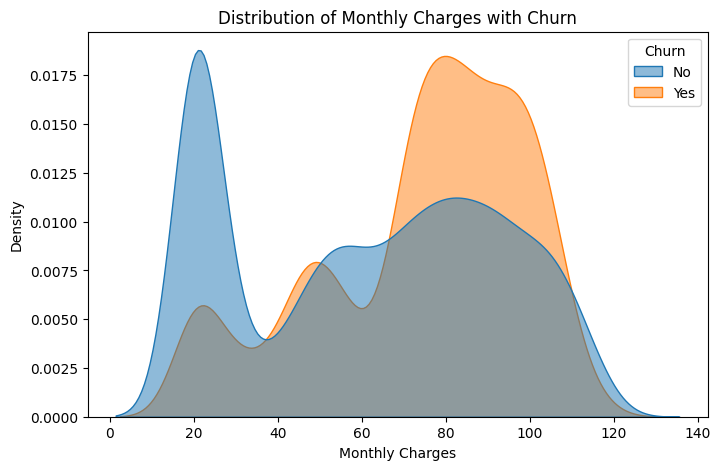

In [79]:
#numerical feature vs churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of Monthly Charges with Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

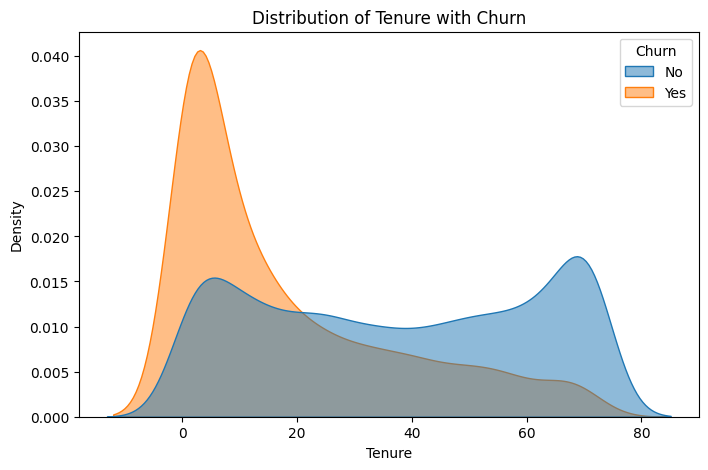

In [80]:
#numerical feature vs churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='tenure',  hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of Tenure with Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

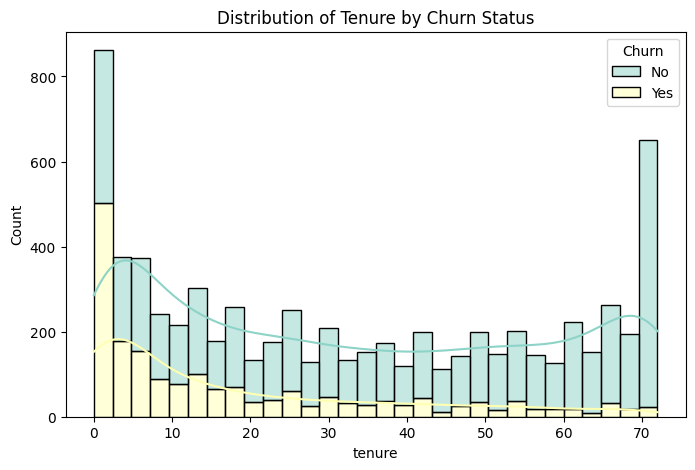

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, multiple="stack", palette="Set3")
plt.title("Distribution of Tenure by Churn Status")
plt.show()

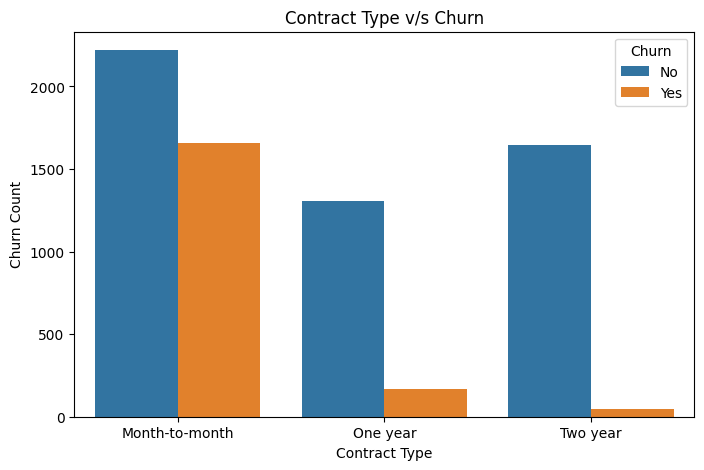

In [82]:
#Categorical feature vs churn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type v/s Churn')
plt.xlabel('Contract Type')
plt.ylabel('Churn Count')
plt.show()

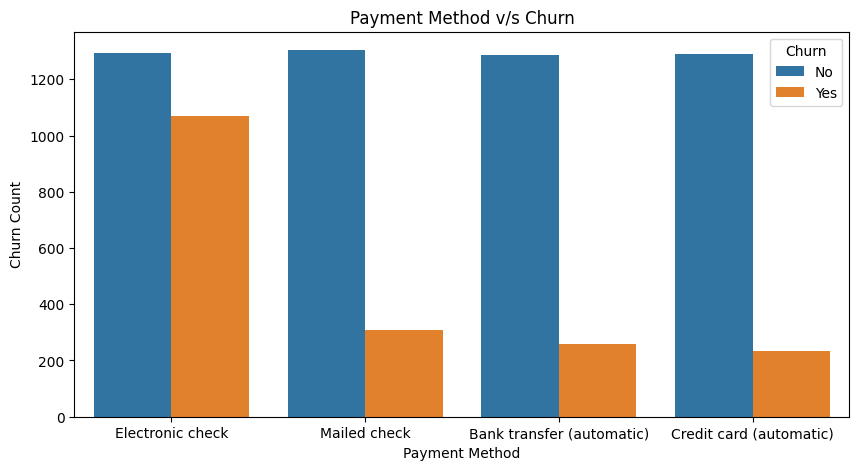

In [83]:
#Categorical feature vs churn
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Payment Method v/s Churn')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')
plt.show()

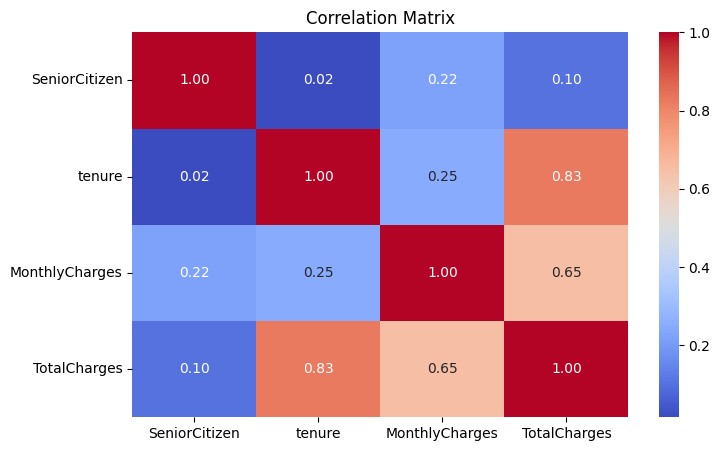

In [84]:
#correlation matrix for numerical columns
num_cols = df.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

EDA Insights

Most customers who churn leave within their first year, showing that new customers are at the highest risk.

People paying higher monthly bills are more likely to churn, but since they leave early, their total charges stay low.

Customers on month-to-month contracts churn the most, while those on long-term contracts (1 or 2 years) are more loyal.

Electronic check payments are linked to the highest churn, while automatic payments (credit card or bank transfer) help reduce churn.

Tenure and total charges go hand in hand — the longer someone stays, the more they’ve paid overall.

Customers with fiber optic internet churn much more than those with DSL or no internet service.

Age and gender don’t show a big impact on churn — churn is more about contract type, payment method, and services.

### Task 2: Feature Engineering

In [85]:
df['AvgMonthlyCharge'] = df['TotalCharges']/df['tenure'].replace(0,1)

In [86]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
df['ServicesCount'] = df[services].apply(lambda row: sum(row=='Yes'), axis=1)

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharge,ServicesCount
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,1


In [88]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])

Helps the model capture nonlinear relationships between loyalty length and churn (e.g., very new customers vs. long-term customers behave differently).

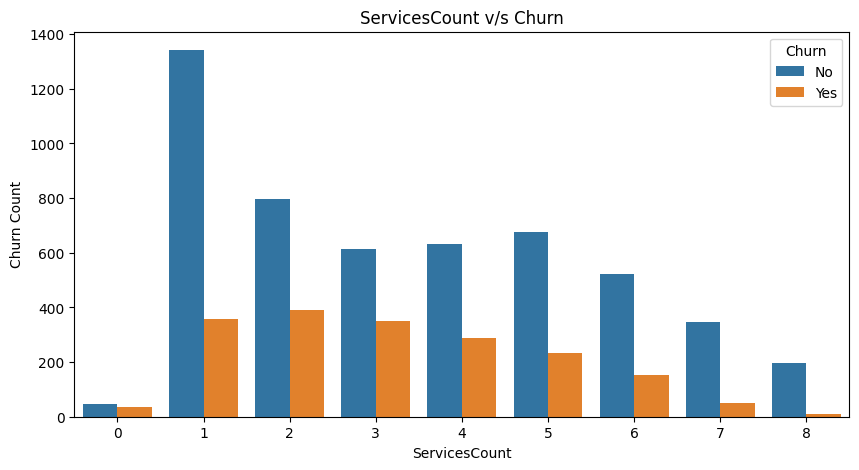

In [89]:
#Categorical feature vs churn
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='ServicesCount', hue='Churn')
plt.title('ServicesCount v/s Churn')
plt.xlabel('ServicesCount')
plt.ylabel('Churn Count')
plt.show()

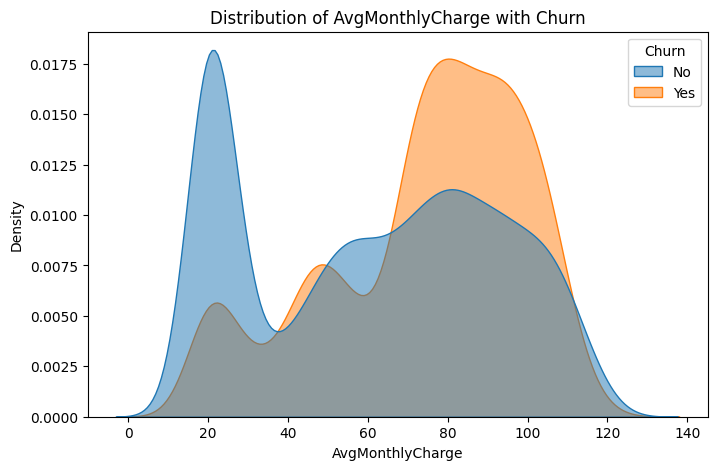

In [90]:
#numerical feature vs churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='AvgMonthlyCharge', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Distribution of AvgMonthlyCharge with Churn')
plt.xlabel('AvgMonthlyCharge')
plt.ylabel('Density')
plt.show()

### Task 3: Building the End-to-End Pipeline

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [92]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'ServicesCount', 'TenureGroup'],
      dtype='object')

In [93]:
numerical = ['tenure','MonthlyCharges', 'TotalCharges','AvgMonthlyCharge', 'ServicesCount' ]
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [94]:
X = df[numerical+categorical]
y = df['Churn'].map({'No':0, 'Yes':1})

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [96]:
num_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical),
        ('cat', cat_pipeline, categorical)
    ]
)

In [97]:
pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]
)

In [98]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AvgMonthlyCharge',
                                                   'ServicesCount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [99]:
y_pred = pipeline_lr.predict(X_test)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report : \n')
print(classification_report(y_test, y_pred))

print('Confusion Matrix : \n')
print(confusion_matrix(y_test, y_pred))

Classification report : 

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix : 

[[943  93]
 [166 207]]


### Task 4: Model Selection and Hyperparameter Tuning

In [101]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [102]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [103]:
for name, clf in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier',clf)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"{name}: mean f1_weighted = {scores.mean():.4f}")

Logistic Regression: mean f1_weighted = 0.7841
Random Forest: mean f1_weighted = 0.7721
Gradient Boosting: mean f1_weighted = 0.7805


Logistic Regression is the best model for churn prediction on this dataset.
Ensemble models like Random Forest and Gradient Boosting are strong alternatives but did not outperform Logistic Regression here.
Hyperparameter tuning improves model reliability and ensures optimal performance.

In [104]:
#selecting now logistic regression as it the highest f1 score
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__C' : [0.01,0.1,1,10,100],
    'classifier__penalty' : ['l1','l2'],
    'classifier__solver' : ['lblinear', 'saga']
}

In [105]:
grid_search = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid,
    cv = 5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'AvgMonthlyCharge',
                                                                          'ServicesCount']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('enco...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lblinear', 'saga']},
             scoring='f1_weighted', verbose=2)

In [106]:
print(f"Best Parameters {grid_search.best_params_}")
print(f'Best Weighted f1 score {grid_search.best_score_}')

Best Parameters {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best Weighted f1 score 0.7846550394558821


In [107]:
y_pred = grid_search.predict(X_test)

In [108]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score

print("Test ROC AUC:", roc_auc_score(y_test, y_pred))
print("Test f1_weighted:", f1_score(y_test, y_pred, average="weighted"))
print("Classification_report \n\n",classification_report(y_test, y_pred))

Test ROC AUC: 0.7325957228772243
Test f1_weighted: 0.8093402560383558
Classification_report 

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



### Task 5: Handling Class Imbalance 

In [109]:
!pip install imbalanced-learn

In [110]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

In [111]:
pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges',
                                                   'AvgMonthlyCharge',
                                                   'ServicesCount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

### Task 6: Final Evaluation and Interpretation 

In [112]:
y_pred_smote = pipeline_smote.predict(X_test)
print("Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_smote))
print("Test f1_weighted:", f1_score(y_test, y_pred_smote, average="weighted"))

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1036
           1       0.52      0.86      0.65       373

    accuracy                           0.75      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.75      0.77      1409

Test ROC AUC: 0.7847567981616239
Test f1_weighted: 0.7655942483796334


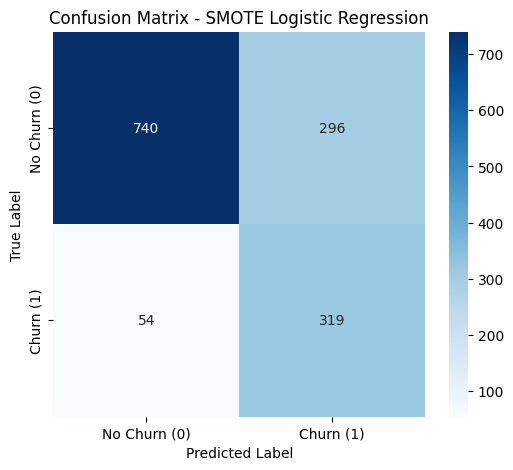

In [113]:
cm = confusion_matrix(y_test, y_pred_smote)
labels = ['No Churn (0)', 'Churn (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE Logistic Regression')
plt.show()


From the above confusion matrix, True Negative = 740, False Positive = 296, False Negative = 54, True Positive = 319. 

So according to business cost, False positive (296) means the model predicted that the customer will churn, but actually he didn't. So you might offer some discounts or offers to the loyal customers that might cost you money, but the customer was not going to churn anyway. 

On the other hand, False Negative (54) means that model predicted that the customer will not churn but he actually churned. You might miss the change to retain a leaving customer. Losing a customer can be more expensive than offering small offers or discounts to the loyal customers. 

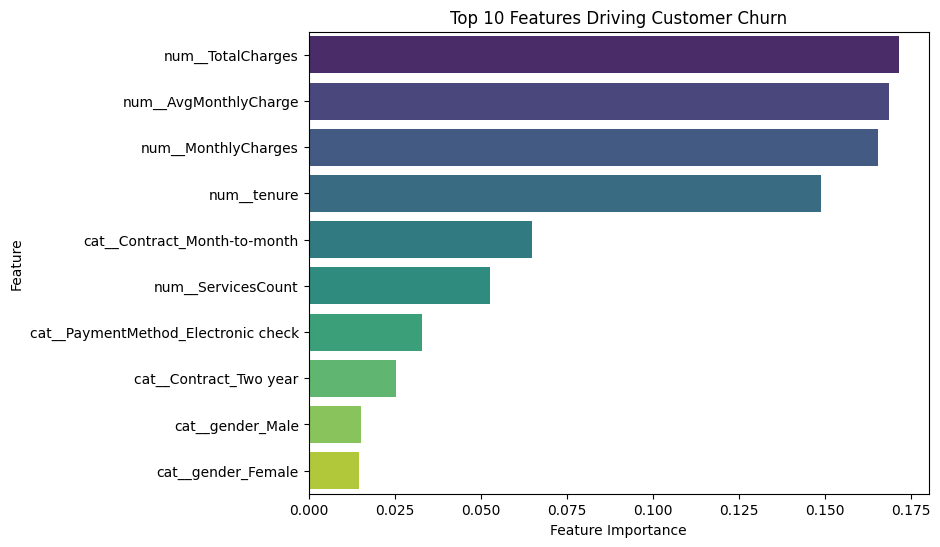

Top 10 Features Driving Customer Churn:
                                Feature  Importance
2                     num__TotalCharges    0.171559
3                 num__AvgMonthlyCharge    0.168617
1                   num__MonthlyCharges    0.165498
0                           num__tenure    0.148850
13         cat__Contract_Month-to-month    0.065043
4                    num__ServicesCount    0.052797
20  cat__PaymentMethod_Electronic check    0.033104
15               cat__Contract_Two year    0.025274
6                      cat__gender_Male    0.015230
5                    cat__gender_Female    0.014749


In [117]:

tree_model = RandomForestClassifier(random_state=42)
pipe_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', tree_model)
])
pipe_tree.fit(X_train, y_train)

feature_names = pipe_tree.named_steps['preprocessor'].get_feature_names_out()
importances = pipe_tree.named_steps['classifier'].feature_importances_

# Create dataframe
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plot top 10
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Driving Customer Churn')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Print the top 10 features with their importance
print("Top 10 Features Driving Customer Churn:")
print(feat_imp[['Feature', 'Importance']])


Customers are more likely to leave if they are new or on month-to-month contracts, as these groups have lower loyalty. Frequent support issues and lack of add-on services like Online Security, Tech Support, or Online Backup also increase churn risk. Additionally, using electronic checks or fiber-optic internet can signal higher churn likelihood. In short, newer, less-supported, or less-engaged customers are at greatest risk, so improving support, promoting add-ons, and encouraging longer contracts can help retain them.